# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data for ML Project

In [2]:
df=pd.read_excel('marketing_campaign.xlsx')

In [3]:
df.shape

(2240, 29)

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Setting Display options to ensure feature name visibility

In [5]:
pd.set_option('display.max_columns',None)

# Warning Suppression 

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Drop ID Feature from the dataset

In [7]:
df=df.drop(['ID'],axis=1)

# Defining Target and Independent Features

In [8]:
type(df['Response'])

pandas.core.series.Series

In [9]:
Y=df[['Response']]
X=df.drop(['Response'],axis=1)

# Get the Response Rate

In [10]:
Y.mean()

Response    0.149107
dtype: float64

# Build Derived Features - Customer Age and Tenure

In [11]:
import datetime
reference_date=datetime.datetime(2024,1,1)
print(reference_date)

2024-01-01 00:00:00


In [12]:
from dateutil.relativedelta import relativedelta

# Convert Year_Birth and Dt_Customer to datetime objects
X['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')
X['Dt_Customer'] = pd.to_datetime(X['Dt_Customer'])

# Calculate Age using relativedelta for years
X['Age'] = X['Year_Birth'].apply(lambda x: relativedelta(reference_date, x).years)

# Calculate Customer Tenure using relativedelta for years
X['Cust_Tenure'] = X['Dt_Customer'].apply(lambda x: relativedelta(reference_date, x).years)

# Drop the original date columns
X = X.drop(['Year_Birth', 'Dt_Customer'], axis=1)


In [13]:
X[['Age','Cust_Tenure']].head()

,Age,Cust_Tenure
0,67,11
1,70,9
2,59,10
3,40,9
4,43,9


# Split features into Numerical and Categorical

In [14]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [15]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x : unique_levels(x)))

In [16]:
df_value_counts.columns=['feature_levels']
df_value_counts.head()

,feature_levels
Income,1974
Kidhome,3
Teenhome,3
Recency,100
MntWines,776


In [17]:
slice1=df_value_counts.loc[df_value_counts['feature_levels']<=20]
cat_list=slice1.index
cat=num.loc[:,cat_list]
cat.dtypes

Kidhome                int64
Teenhome               int64
NumDealsPurchases      int64
NumWebPurchases        int64
NumCatalogPurchases    int64
NumStorePurchases      int64
NumWebVisitsMonth      int64
AcceptedCmp3           int64
AcceptedCmp4           int64
AcceptedCmp5           int64
AcceptedCmp1           int64
AcceptedCmp2           int64
Complain               int64
Z_CostContact          int64
Z_Revenue              int64
Cust_Tenure            int64
dtype: object

In [18]:
def data_type_converter(x):
    x=x.astype('object')
    return(x)
cat=cat.apply(lambda x : data_type_converter(x))
cat.dtypes

Kidhome                object
Teenhome               object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Z_CostContact          object
Z_Revenue              object
Cust_Tenure            object
dtype: object

In [19]:
slice2=df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list=slice2.index
num=num.loc[:,num_list]

In [20]:
char=pd.concat([char,cat],axis=1,join="inner")

In [21]:
print ("The shape of numerical dataframe :",num.shape)
print ("The shape of categorical datafrme :",char.shape)

The shape of numerical dataframe : (2240, 9)
The shape of categorical datafrme : (2240, 18)


# Outlier Analysis of Numerical Features

In [22]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,55.194196
std,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,11.984069
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000
1%,7579.200000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,32.000000
5%,18985.500000,4.000000,3.000000,0.000000,4.000000,0.000000,0.000000,1.000000,36.000000
10%,24117.500000,9.000000,6.000000,0.000000,7.000000,0.000000,0.000000,3.000000,40.000000
25%,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,47.000000
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,54.000000
75%,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,65.000000


# Capping and Flooring of outliers

In [23]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [24]:
num=num.apply(lambda x : outlier_cap(x))

In [25]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,51770.277076,49.101786,302.909821,26.158482,165.075446,37.351366,26.873687,43.770089,55.132143
std,20728.704775,28.949501,333.316827,39.208270,216.547373,53.985910,40.484302,51.118104,11.666094
min,7579.200000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,32.000000
1%,7646.520000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,32.000000
5%,18985.500000,4.000000,3.000000,0.000000,4.000000,0.000000,0.000000,1.000000,36.000000
10%,24117.500000,9.000000,6.000000,0.000000,7.000000,0.000000,0.000000,3.000000,40.000000
25%,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,47.000000
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,54.000000
75%,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,65.000000


# Missing Value Handling - Numerical Features 

In [26]:
num.isnull().mean()

Income              0.010714
Recency             0.000000
MntWines            0.000000
MntFruits           0.000000
MntMeatProducts     0.000000
MntFishProducts     0.000000
MntSweetProducts    0.000000
MntGoldProds        0.000000
Age                 0.000000
dtype: float64

# Missing Value Handling - Numerical Features (Imputation with Mean)

In [27]:
num_1=num
num_1['Income'] = num_1['Income'].fillna(num_1['Income'].mean())

In [28]:
num_1.isnull().mean()

Income              0.0
Recency             0.0
MntWines            0.0
MntFruits           0.0
MntMeatProducts     0.0
MntFishProducts     0.0
MntSweetProducts    0.0
MntGoldProds        0.0
Age                 0.0
dtype: float64

# Missing Value Handling - Categorical Features (Remove >25% Missing Rows)

In [29]:
char.isnull().mean()

Education              0.0
Marital_Status         0.0
Kidhome                0.0
Teenhome               0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Cust_Tenure            0.0
dtype: float64

# Feature Selection - Numerical Features 

# Part 1 : Remove Features with 0 Variance

In [30]:
variances = num_1.var()
# Identify columns with zero variance
zero_variance_columns = variances[variances == 0].index
# Drop columns with zero variance
num_2 = num_1.drop(columns=zero_variance_columns)

In [31]:
num_2.iloc[0]

Income              58138.0
Recency                58.0
MntWines              635.0
MntFruits              88.0
MntMeatProducts       546.0
MntFishProducts       172.0
MntSweetProducts       88.0
MntGoldProds           88.0
Age                    67.0
Name: 0, dtype: float64

# Part 2 - Bi Variate Analysis (Feature Discretization)

In [32]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_2),index=num_2.index, columns=num_2.columns).add_suffix('_Rank')
num_binned.head()

,Income_Rank,Recency_Rank,MntWines_Rank,MntFruits_Rank,MntMeatProducts_Rank,MntFishProducts_Rank,MntSweetProducts_Rank,MntGoldProds_Rank,Age_Rank
0,5.0,5.0,8.0,8.0,9.0,8.0,7.0,8.0,8.0
1,4.0,3.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0
2,7.0,2.0,7.0,7.0,6.0,7.0,5.0,6.0,6.0
3,1.0,2.0,1.0,3.0,3.0,3.0,2.0,1.0,1.0
4,6.0,9.0,4.0,6.0,6.0,6.0,6.0,3.0,1.0


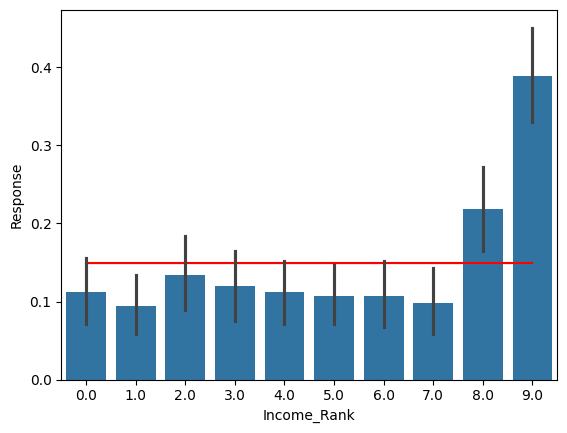

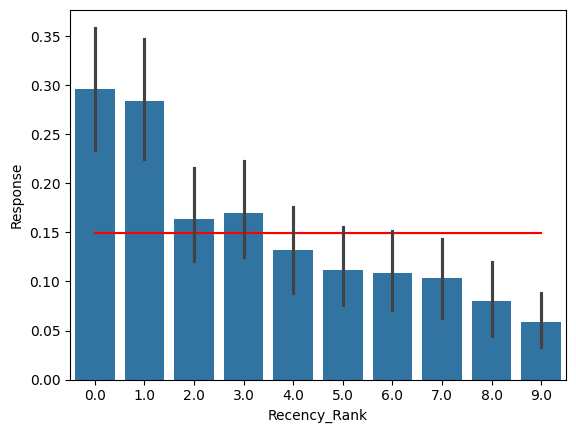

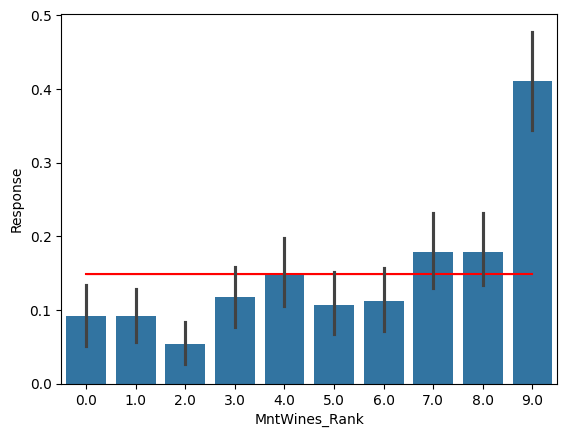

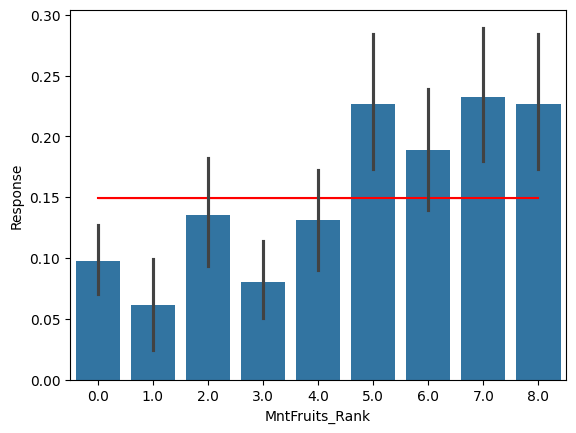

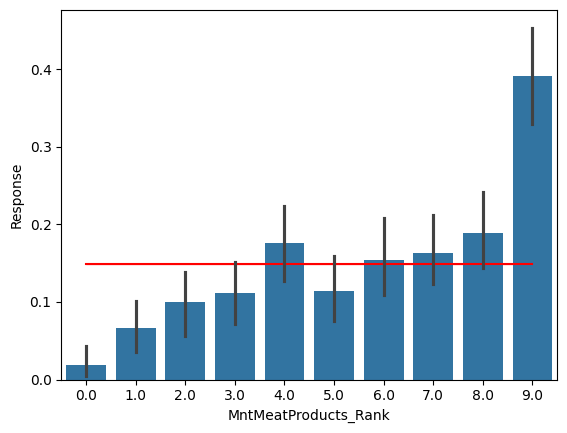

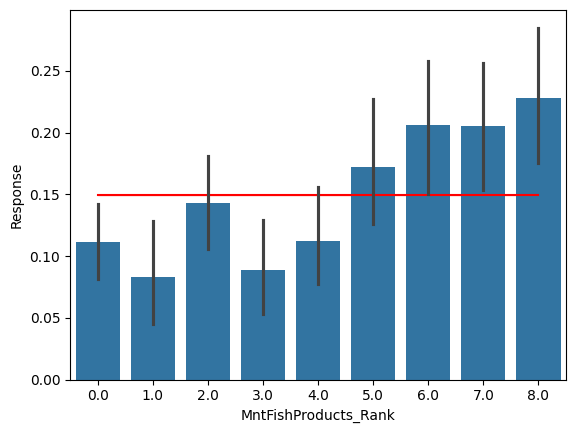

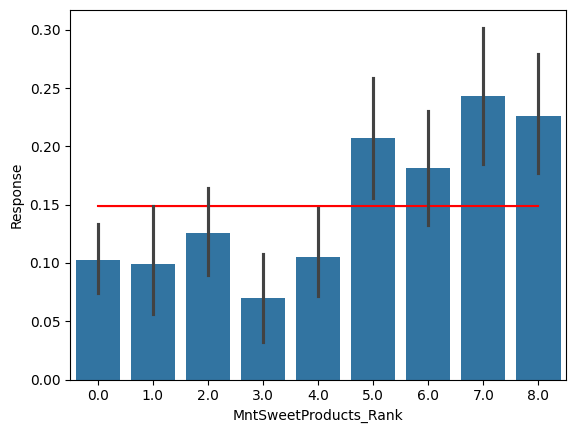

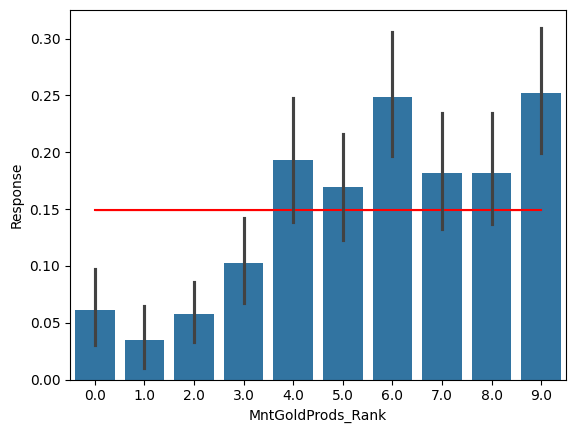

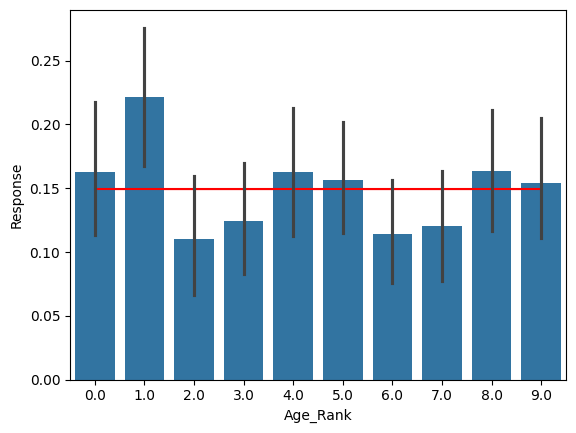

In [33]:
X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_bin_combined['Response'].mean(),data=X_bin_combined,color='red')
    sns.barplot(x=col, y="Response",data=X_bin_combined, estimator=mean )
plt.show()

In [34]:
num_droplist=['Age']
num_2=num_2.drop(num_droplist,axis=1)
num_2.shape

(2240, 8)

# Part 3 - Select K Best

In [35]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2,k=6)
selector.fit_transform(num_2, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_num = num_1.iloc[:,cols]

In [36]:
select_features_df_num.iloc[0]

Income             58138.0
MntWines             635.0
MntFruits             88.0
MntMeatProducts      546.0
MntFishProducts      172.0
MntGoldProds          88.0
Name: 0, dtype: float64

# Feature Selection - Categorical Features 

In [37]:
char.dtypes

Education              object
Marital_Status         object
Kidhome                object
Teenhome               object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Z_CostContact          object
Z_Revenue              object
Cust_Tenure            object
dtype: object

In [38]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
char_unique_levels=pd.DataFrame(char.apply(lambda x : unique_levels(x)))

In [39]:
char_unique_levels

,0
Education,5
Marital_Status,8
Kidhome,3
Teenhome,3
NumDealsPurchases,15
NumWebPurchases,15
NumCatalogPurchases,14
NumStorePurchases,14
NumWebVisitsMonth,16
AcceptedCmp3,2


In [40]:
char_unique_levels.columns=['feature_levels']
slice1=char_unique_levels.loc[char_unique_levels['feature_levels']>1]
cat_list=slice1.index
char=char.loc[:,cat_list]

# Part 1 - Bi Variate Analysis

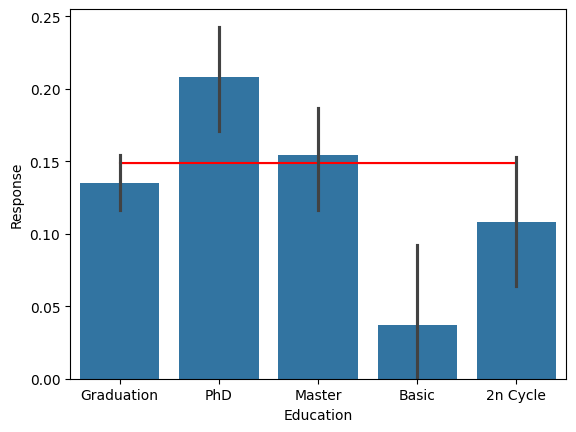

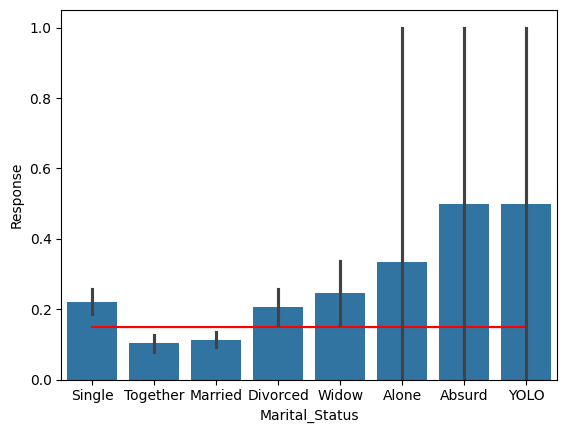

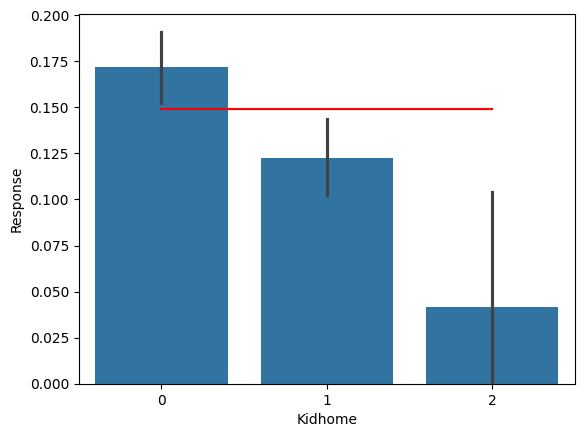

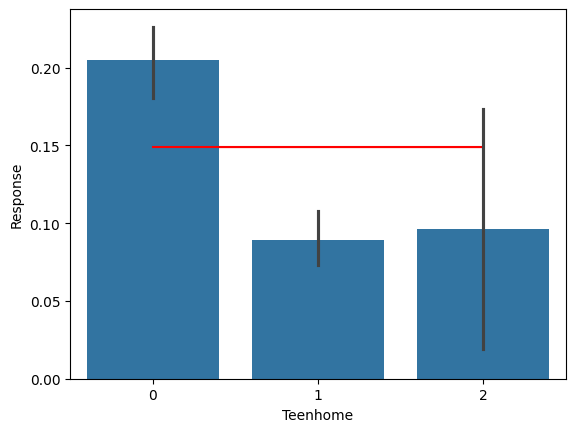

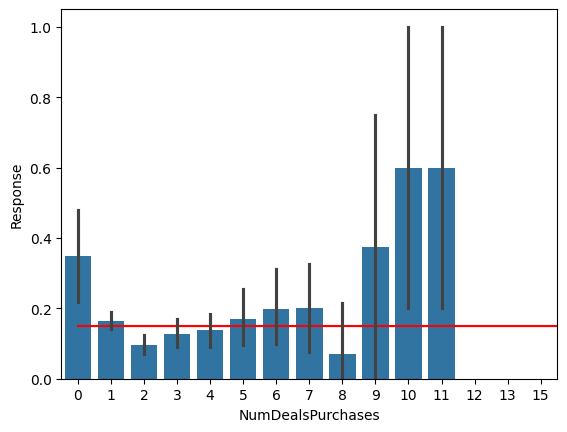

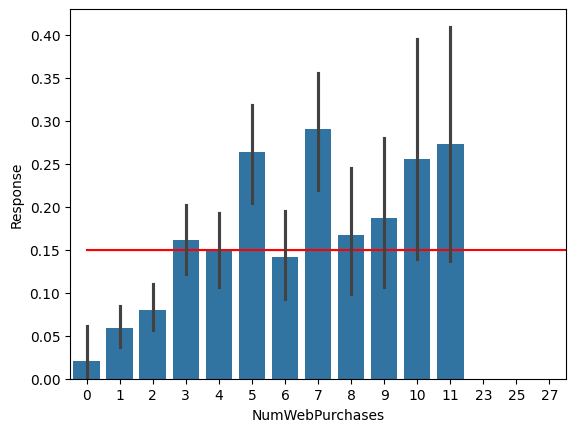

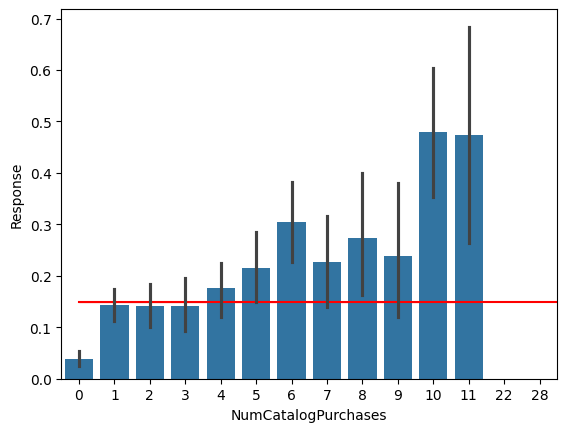

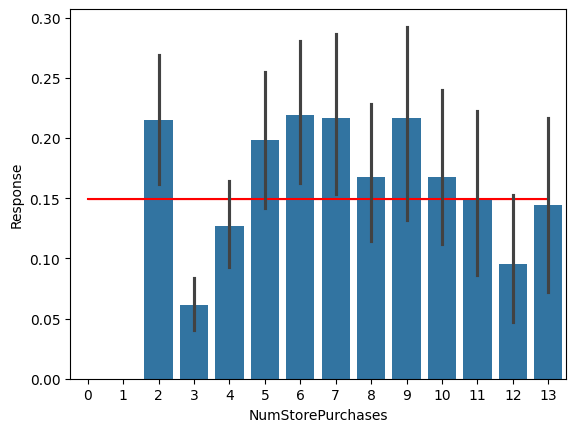

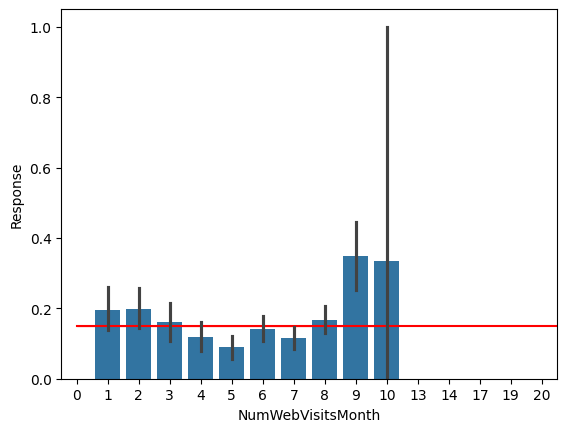

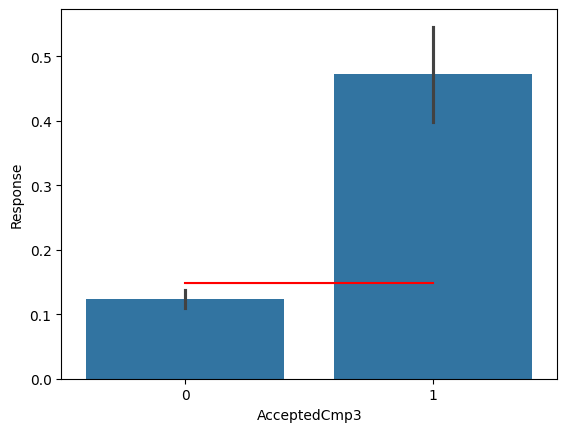

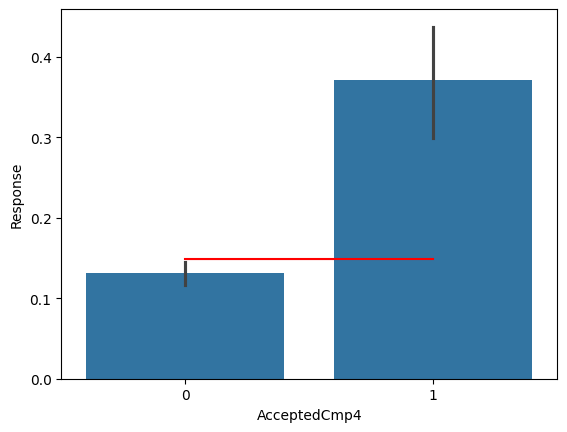

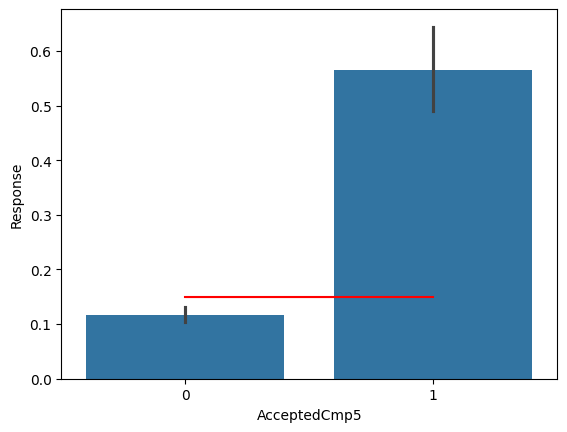

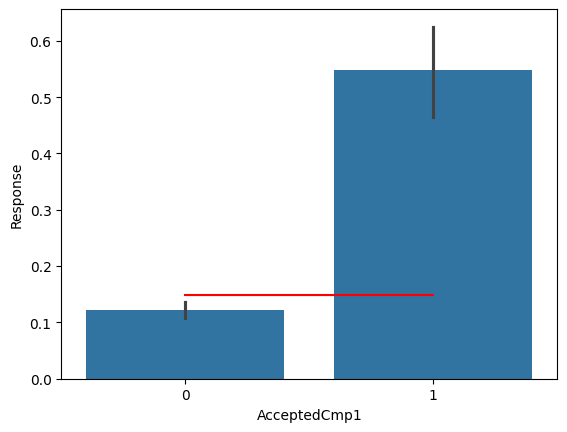

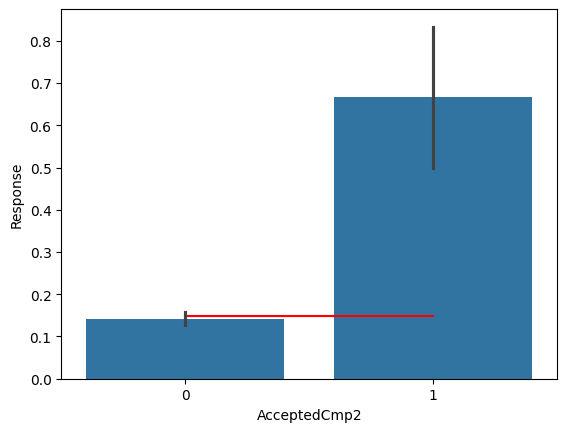

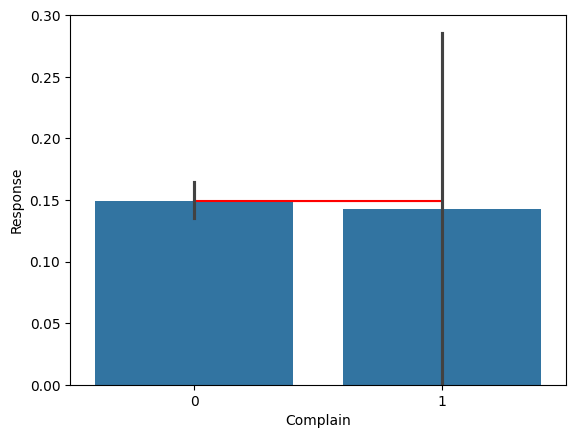

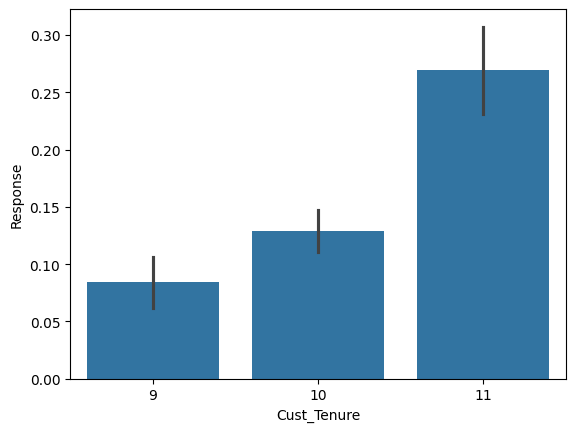

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_char_merged['Response'].mean(),data=X_char_merged,color='red')
    sns.barplot(x=col, y="Response",data=X_char_merged, estimator=mean )
plt.show()

In [42]:
char.dtypes

Education              object
Marital_Status         object
Kidhome                object
Teenhome               object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Cust_Tenure            object
dtype: object

In [43]:
char_droplist=['Education','NumStorePurchases','Complain']
char=char.drop(char_droplist,axis=1)
char.shape

(2240, 13)

In [44]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum = X_char_dum.astype(np.uint8)
X_char_dum.shape

(2240, 74)

# Part 2 - Select K Best

In [45]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=70)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [46]:
select_features_df_char.dtypes

Marital_Status_Alone       uint8
Marital_Status_Divorced    uint8
Marital_Status_Married     uint8
Marital_Status_Single      uint8
Marital_Status_Together    uint8
                           ...  
AcceptedCmp5_1             uint8
AcceptedCmp1_1             uint8
AcceptedCmp2_1             uint8
Cust_Tenure_10             uint8
Cust_Tenure_11             uint8
Length: 70, dtype: object

# Creating the Master Feature Set for Model Development

In [47]:
X_all=pd.concat([select_features_df_char,select_features_df_num],axis=1,join="inner")
print(X_all)

      Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  \
0                        0                        0                       0   
1                        0                        0                       0   
2                        0                        0                       0   
3                        0                        0                       0   
4                        0                        0                       1   
...                    ...                      ...                     ...   
2235                     0                        0                       1   
2236                     0                        0                       0   
2237                     0                        1                       0   
2238                     0                        0                       0   
2239                     0                        0                       1   

      Marital_Status_Single  Marital_Status_Togethe

# Dimensionality Reduction through Variable Clustering

In [48]:
from varclushi import VarClusHi
vc = VarClusHi(X_all,maxeigval2=1,maxclus=None)
vc.varclus()

In [49]:
vc.info

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,8,4.016371,0.961196,0.502046
1,1,4,1.635838,0.979786,0.408960
2,2,4,1.832339,0.887457,0.458085
3,3,3,1.574876,0.993826,0.524959
4,4,2,1.533925,0.466075,0.766963
5,5,2,1.200920,0.799080,0.600460
6,6,3,1.415532,0.998584,0.471844
7,7,2,1.030270,0.969730,0.515135
8,8,3,1.201906,0.958295,0.400635
9,9,4,1.065564,0.993028,0.266391


In [50]:
check=vc.rsquare
check

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,Kidhome_1,0.438819,0.076622,0.607749
1,0,Income,0.736300,0.168487,0.317133
2,0,MntWines,0.593854,0.274441,0.559769
3,0,MntFruits,0.540704,0.079952,0.499209
4,0,MntMeatProducts,0.691833,0.156511,0.365347
...,...,...,...,...,...
71,30,NumWebPurchases_25,1.000000,0.002089,0.000000
72,31,NumWebVisitsMonth_17,1.000000,0.001375,0.000000
73,32,NumDealsPurchases_13,1.000000,0.001330,0.000000
74,33,NumDealsPurchases_12,1.000000,0.005236,0.000000


In [51]:
filter=check[check['RS_Ratio']<=0.5]
filter.shape

(45, 5)

In [52]:
final_features=filter['Variable']
X_all=X_all[final_features]
X_all.shape

(2240, 45)

# Train Test Split

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=20)

In [54]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (1568, 45)
Shape of Testing Data (672, 45)
Response Rate in Training Data Response    0.149872
dtype: float64
Response Rate in Testing Data Response    0.147321
dtype: float64


# Building Logistic Regression Model

In [55]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=20)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=20)

# Building Decision Tree Model

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=20)

# Grid Search for Model Optimization

In [57]:
# Min_Samples_Split starting from 5% of training base
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [75,100,125,150] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_split': 75}


In [58]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=20,max_depth=5,min_samples_split=75)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=75, random_state=20)

# Building Random Forest Model

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=20,max_depth=5,min_samples_split=75)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=75, random_state=20)

# Building Gradient Boosting Model

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='squared_error',random_state=20,max_depth=5,min_samples_split=75)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='squared_error', max_depth=5,
                           min_samples_split=75, random_state=20)

# Model Evaluation

In [78]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [79]:
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)

In [97]:
print("Accuracy from Logistic Regression Model :",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision from Logistic Regression Model :",metrics.precision_score(y_test,y_pred_logreg))
print("Recall from Logistic Regression Model :",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score from Logistic Regression Model :",metrics.f1_score(y_test,y_pred_logreg))
print("Area under ROC Curve from Logistic Regression Model :",metrics.roc_auc_score(y_test,y_pred_logreg))

Accuracy from Logistic Regression Model : 0.8616071428571429
Precision from Logistic Regression Model : 0.6363636363636364
Recall from Logistic Regression Model : 0.1414141414141414
f1_score from Logistic Regression Model : 0.23140495867768596
Area under ROC Curve from Logistic Regression Model : 0.5637262679147496


In [98]:
print("Accuracy from Decision Tree Model :",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision from Decision Tree Model :",metrics.precision_score(y_test,y_pred_tree))
print("Recall from Decision Tree Model :",metrics.recall_score(y_test,y_pred_tree))
print("f1_score from Decision Tree Model :",metrics.f1_score(y_test,y_pred_tree))
print("Area under ROC Curve from Decision Tree Model :",metrics.roc_auc_score(y_test,y_pred_tree))

Accuracy from Decision Tree Model : 0.8556547619047619
Precision from Decision Tree Model : 0.5555555555555556
Recall from Decision Tree Model : 0.10101010101010101
f1_score from Decision Tree Model : 0.17094017094017094
Area under ROC Curve from Decision Tree Model : 0.5435242477127293


In [99]:
print("Accuracy from Random Forest Model :",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision from Random Forest Model :",metrics.precision_score(y_test,y_pred_rf))
print("Recall from Random Forest Model :",metrics.recall_score(y_test,y_pred_rf))
print("f1_score from Random Forest Model :",metrics.f1_score(y_test,y_pred_rf))
print("Area under ROC Curve from Random Forest Model :",metrics.roc_auc_score(y_test,y_pred_rf))

Accuracy from Random Forest Model : 0.8526785714285714
Precision from Random Forest Model : 0.0
Recall from Random Forest Model : 0.0
f1_score from Random Forest Model : 0.0
Area under ROC Curve from Random Forest Model : 0.5


In [100]:
print("Accuracy from GBM Model :",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision from GBM Model :",metrics.precision_score(y_test,y_pred_gbm))
print("Recall from GBM Model :",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score from GBM Model :",metrics.f1_score(y_test,y_pred_gbm))
print("Area under ROC Curve from GBM Model :",metrics.roc_auc_score(y_test,y_pred_gbm))

Accuracy from GBM Model : 0.8630952380952381
Precision from GBM Model : 0.5813953488372093
Recall from GBM Model : 0.25252525252525254
f1_score from GBM Model : 0.352112676056338
Area under ROC Curve from GBM Model : 0.6105558199799037


# Extracting Feature Importance from the best model

In [94]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances.shape

(45, 1)

# Extracting the Top 10 Important Model Features

In [95]:
feature_importances.iloc[0:10]

,importance
Income,0.239695
MntMeatProducts,0.234649
AcceptedCmp3_1,0.107848
MntFishProducts,0.076480
MntFruits,0.066708
Cust_Tenure_11,0.053316
NumCatalogPurchases_10,0.026466
Marital_Status_Together,0.022226
Marital_Status_Single,0.016421
Marital_Status_Married,0.015557


# Plotting the top 10 feature importances in a Horizontal Bar Plot

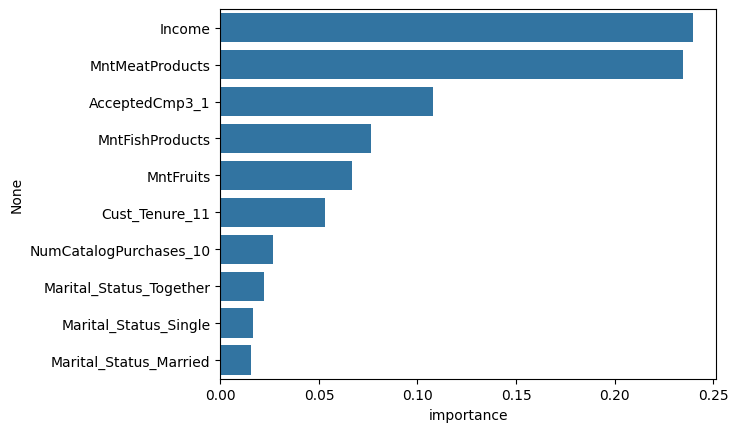

In [96]:
ax=sns.barplot(x='importance',y=feature_importances.iloc[0:10].index,data=feature_importances.iloc[0:10])

# Objective of the Project
Leverage the spend behavior and past campaign responses to build a response model that can
be used to devise a strategy that enhances the response rates and improves profitability of marketing campaigns

# Baseline Event Rate
The Response Rate from the data is 14.9%

# Algorithms Used :
In this project we have used Logistic Regression, Decision Trees, Random Forests and Gradient Boosting Algorithms

# Final Model Algorithm
Among the models that we tried building the GBM Algorithm performed the best in terms of F1_Score, Area under ROC Curve

Therefore we have kept GBM as the final model algorithm

# Model Performance Measures
Accuracy - 0.86

Precision - 0.58

Recall - 0.25

F1 Score - 0.35

AUC - 0.61

# Top 10 drivers from the Model

Income

MntMeatProducts

AcceptedCmp3_1

MntFishProducts

MntFruits

Cust_Tenure_8.0

NumCatalogPurchases_10

Marital_Status_Together

Marital_Status_Single

Marital_Status_Married

